**Two-way ANOVA** is used to estimate how the mean of a quantitative variable changes according to the levels of two categorical variables.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# creat a dataset

df = pd.DataFrame({'water': np.repeat(['daily','weakly'],15),
                    'sun': np.tile(np.repeat(['low','medium','high'], 5), 2),
                    'height': [6,6,6,5,6,5,5,6,4,5,
                            6,6,7,8,7,3,4,4,4,5,
                            4,4,4,4,4,5,6,6,7,8]})
#look into data
df.sample(10)

,water,sun,height
7,daily,medium,6
4,daily,low,6
19,weakly,low,5
3,daily,low,5
13,daily,high,8
8,daily,medium,4
14,daily,high,7
16,weakly,low,4
9,daily,medium,5
2,daily,low,6


There are 2 catagorical column having 5 catagories ,
1. if 2 catagories in one column : t-test
2. if more than 2 in one column : ANOVA
3. if more than 2 in two columns : two-way-ANOVA

C:\Users\Azka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

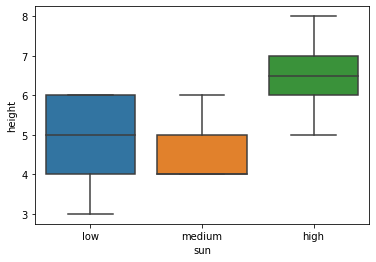

In [3]:
sns.boxplot(df['sun'],df['height']) #one way ANOVA date

C:\Users\Azka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

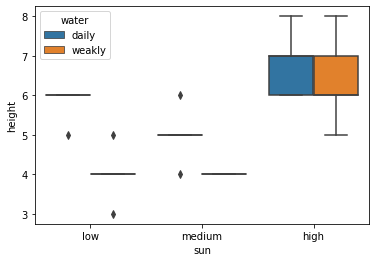

In [4]:
sns.boxplot(df['sun'],df['height'], hue=df['water']) # two way ANOVA data

## 1. ANOVA METHOD through statsmodels

In [5]:
#import libararies
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
# ANOVA oneway
model=ols('height~sun',data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


- Sun effect on plant height = significant because PR<0.05

In [7]:
# ANOVA Two-Way
model=ols('height~ C(sun) + C(water) + C(sun) : C(water)',data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


- sun effect on plant height = significant because PR<0.05
- water effect on plant height = significant because PR<0.05
- sun+water interactive effect on plant height is not significant because PR > 0.05

## 2. ANOVA METHOD through pingouin

In [8]:
# example of one way anova
import pingouin as pg
aov = pg.anova(data=df, dv='height', between='sun', detailed=True)
print(aov)

   Source         SS  DF         MS          F     p-unc       np2
0     sun  24.866667   2  12.433333  14.105042  0.000064  0.510959
1  Within  23.800000  27   0.881481        NaN       NaN       NaN


In [9]:
# example of one way anova
import pingouin as pg
aov = pg.anova(data=df, dv='height', between=['sun','water'], detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


- Through both methods results are same

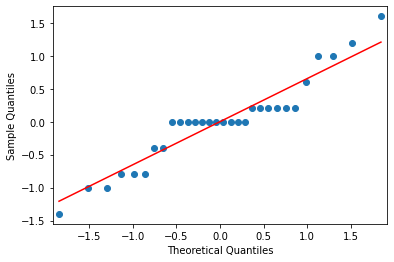

In [10]:
# qq norms plot
res = model.resid
fig =sm.qqplot(res,line='s')
plt.show()

In [11]:
# tukey test kaisy lagana ha 2-way anova py?

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
tukey= pairwise_tukeyhsd(endog=df['height'], groups=df['water'], alpha=0.05)
print(tukey.summary)

<bound method TukeyHSDResults.summary of <statsmodels.sandbox.stats.multicomp.TukeyHSDResults object at 0x00000197881E24C0>>


In [12]:
# perform multiple pairwise comparison (Tukey HSD)
tukey= pairwise_tukeyhsd(endog=df['height'], groups=df['sun'], alpha=0.05)
print(tukey.summary)

<bound method TukeyHSDResults.summary of <statsmodels.sandbox.stats.multicomp.TukeyHSDResults object at 0x000001978831D520>>


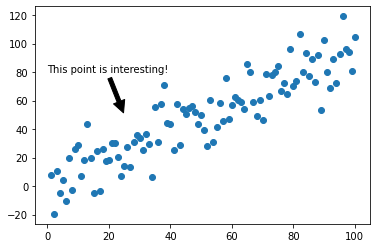

In [13]:
#annotation kesy krni h graph me?

# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
#Data
df=pd.DataFrame({'x_pos': range(1,101), 'y_pos': np.random.randn(100)*15+range(1,101) })

# Basic chart
plt.plot('x_pos', 'y_pos', data=df,  linestyle='none', marker='o')
 
# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
'This point is interesting!', xy=(25, 50), xytext=(0, 80),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05))

# Show the graph
plt.show()